In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from bs4 import BeautifulSoup

In [14]:
#Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

# Create a ticker object for Tesla
tsla = yf.Ticker("TSLA")

# Extract stock data
tsla_info = tsla.info

# Display basic information about Tesla
print(tsla_info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [15]:
#Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Display the first 500 characters of the HTML data to verify
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


In [16]:
#Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

# Create a ticker object for GameStop
ticker = yf.Ticker("GME")

# Get historical market data
hist = ticker.history(period="1mo")  # Adjust the period as needed (e.g., "1d", "1wk", "1mo", "1y", "max")
print(hist)

# Get stock info
info = ticker.info
print(info)

# Get financials
financials = ticker.financials
print(financials)

# Get major holders
holders = ticker.major_holders
print(holders)

print(dir(ticker))

                                Open       High        Low      Close  \
Date                                                                    
2024-06-27 00:00:00-04:00  24.100000  26.690001  24.059999  25.090000   
2024-06-28 00:00:00-04:00  25.020000  26.170000  24.309999  24.690001   
2024-07-01 00:00:00-04:00  23.350000  23.780001  22.309999  23.330000   
2024-07-02 00:00:00-04:00  23.240000  24.320000  23.100000  23.980000   
2024-07-03 00:00:00-04:00  24.030001  24.889999  23.650000  24.370001   
2024-07-05 00:00:00-04:00  24.180000  25.080000  23.820000  24.180000   
2024-07-08 00:00:00-04:00  24.120001  25.139999  23.850000  24.450001   
2024-07-09 00:00:00-04:00  24.600000  25.180000  24.000000  24.600000   
2024-07-10 00:00:00-04:00  25.000000  26.450001  24.900000  24.969999   
2024-07-11 00:00:00-04:00  25.440001  26.020000  25.020000  25.570000   
2024-07-12 00:00:00-04:00  25.760000  26.889999  25.420000  26.049999   
2024-07-15 00:00:00-04:00  25.980000  27.200001  25

In [17]:
#Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
   
# URL of the webpage to be downloaded
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable
html_data_2 = response.text

# Optionally, print the first 500 characters to verify
print(html_data_2[:500])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


[*********************100%%**********************]  1 of 1 completed


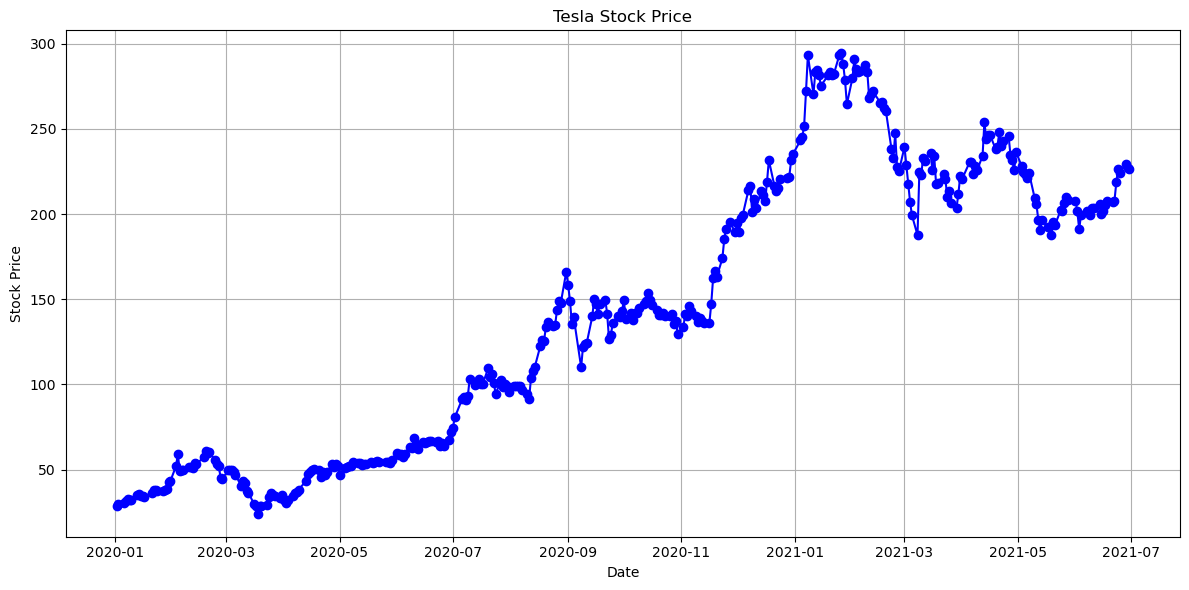

In [18]:
#Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

# Fetching Tesla stock data for the year 2021
tesla_data = yf.download('TSLA', start='2020-01-01', end='2021-12-31')

# Creating a DataFrame with the 'Date' and 'Close' columns
tesla_stock = tesla_data.reset_index()[['Date', 'Close']]

# Convert 'Date' column to datetime
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])

# Filter data up to June 2021
tesla_data_filtered = tesla_stock[tesla_stock['Date'] <= datetime(2021, 6, 30)]

# Function to plot the graph
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    
    # Plot stock price data
    plt.plot(stock_data['Date'], stock_data['Close'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'{title} Stock Price')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the Tesla stock graph
make_graph(tesla_data_filtered, 'Tesla')

[*********************100%%**********************]  1 of 1 completed


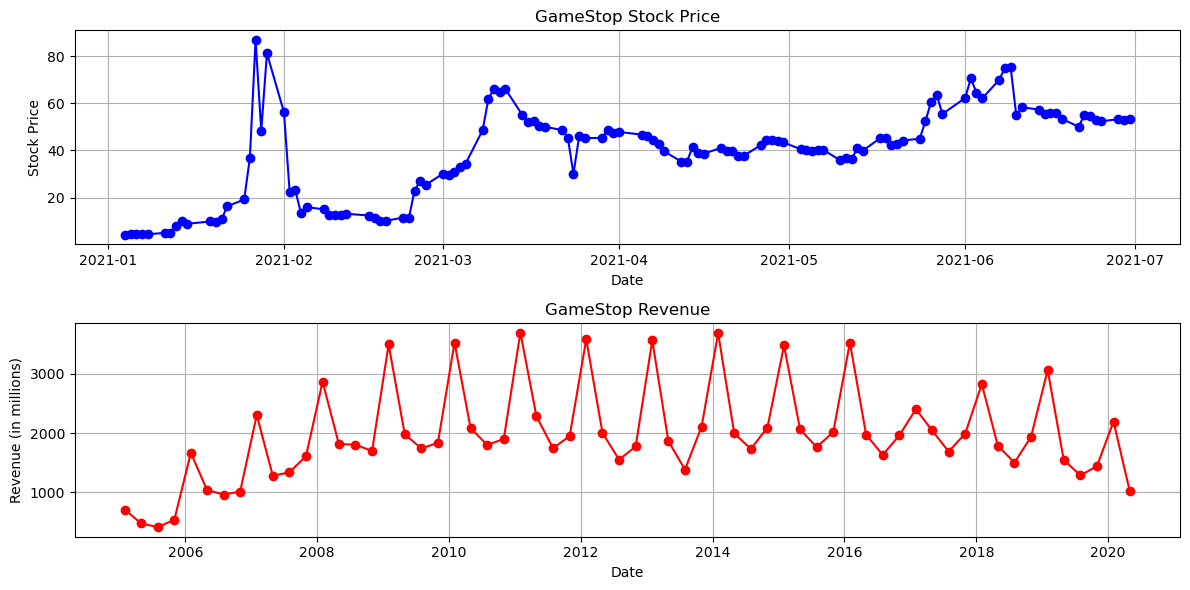

In [21]:
#Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
# Fetching GameStop stock data for the year 2021
gme_data = yf.download('GME', start='2021-01-01', end='2021-12-31')

# Creating a DataFrame with the 'Date' and 'Close' columns
gme_stock = gme_data.reset_index()[['Date', 'Close']]

# URL for GME Revenue to be downloaded
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Fetch the webpage
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Parse the revenue data
revenue_table = soup.find_all('table')[1]
revenue_rows = revenue_table.find_all('tr')

# Extract the date and revenue information
revenue_data = []
for row in revenue_rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(',', '').replace('$', '')
    revenue_data.append([date, revenue])

# Create a DataFrame for revenue data
gme_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

# Function to plot the graph
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    
    # Plot stock price data
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'{title} Stock Price')
    plt.grid(True)
    
    # Plot revenue data
    plt.subplot(2, 1, 2)
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], marker='o', linestyle='-', color='r')
    plt.xlabel('Date')
    plt.ylabel('Revenue (in millions)')
    plt.title(f'{title} Revenue')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Convert 'Date' column to datetime
gme_stock['Date'] = pd.to_datetime(gme_stock['Date'])

# Filter data up to June 2021
gme_data_filtered = gme_stock[gme_stock['Date'] <= datetime(2021, 6, 30)]
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= datetime(2021, 6, 30)]

# Plot the GameStop stock graph
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop')